In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
from os.path import join

#function to add contrast to the image, returns image with better contrast
def add_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a,b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

imgname = 'test.jpg'

def read_image(image):
    return cv2.imread(image)

def display_image(image):
    plt.imshow(image)
    plt.show()

def resize_image(image, size=(800,800)):
    return cv2.resize(image, size)

def blur_image(image):
    return cv2.GaussianBlur(image, (11, 11), 0)

def combine(image, contrast=True, resize=True, blur=False):
    if contrast:
        img = add_contrast(image)
    if resize:
        img = resize_image(img)
    if blur:
        img = blur_image(img)

    return img

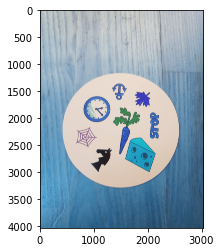

In [69]:
fotka = read_image(imgname)
display_image(fotka)

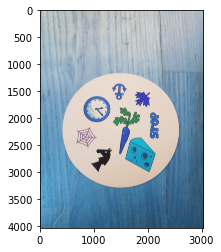

In [5]:
fotka_blur = blur_image(fotka)
display_image(fotka_blur)

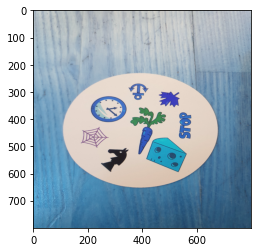

In [7]:
fotka_resize = resize_image(fotka)
display_image(fotka_resize)

In [12]:
def gray_image(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

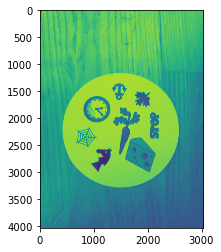

In [13]:
fotka_gray = gray_image(fotka)
display_image(fotka_gray)

In [14]:
def convert_color(image, toRGB=True):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

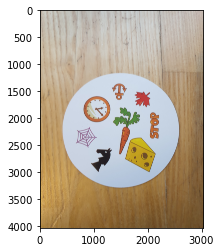

In [15]:
fotka_converted = convert_color(fotka)
display_image(fotka_converted)

In [57]:
def thresh_image(image, threshold=190):
    return cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)[1]

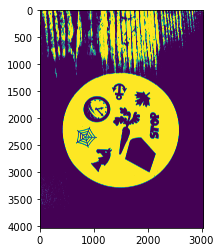

In [58]:
fotka_threshed = thresh_image(fotka_gray)
display_image(fotka_threshed)

In [70]:
kontury, hierarchy = cv2.findContours(fotka_threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [71]:
cv2.drawContours(fotka, kontury, -1, (0,255,0), 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[ 61, 122, 166],
        [ 60, 121, 165],
        [ 61, 122, 166],
        ...,
        [ 39,  78, 110],
        [ 39,  78, 110],
        [ 40,  79, 111]],

       [[ 63, 124, 168],
        [ 62, 123, 167],
        [ 60, 121, 165],
        ...,
        [ 39,  78, 110],
        [ 39,  78, 110],
        [ 42,  81, 113]],

       [[ 64, 125, 169],
        [ 62, 123, 167],
        [ 58, 119, 163],
        ...,
        [ 37,  76, 108],
        [ 40,  79, 111],
        [ 41,  80, 112]]

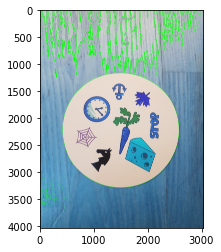

In [72]:
display_image(fotka)